Business Objective:

The e-commerce company is expecting below analysis using the data
1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
 * Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

2. Perform Detailed exploratory analysis
* Understanding how many customers acquired every month
* Understand the retention of customers on month on month basis
* How the revenues from existing/new customers on month on month basis
* How the discounts playing role in the revenues?
* Analyse KPI’s like Revenue, number of orders, average order value, number of
customers (existing/new), quantity, by category, by month, by week, by day etc…
* Understand the trends/seasonality of sales by category, location, month etc…
* How number order varies and sales with different days?
* Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.
* How marketing spend is impacting on revenue?
* Which product was appeared in the transactions?
* Which product was purchased mostly based on the quantity?
  
3. Performing Customer Segmentation
* Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,
Standard customers and define strategy on the same.
* Scientific (Using K-Means) & Understand the profiles. Define strategy for each
segment.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
cust= pd.read_excel('CustomersData.xlsx')
display(cust.head(3))

sales=pd.read_csv('Online_Sales.csv')
display(sales.head(3))

discount= pd.read_csv('Discount_Coupon.csv')
display(discount.head(3))

tax=pd.read_excel('Tax_amount.xlsx')
display(tax.head(3))

market= pd.read_csv('Marketing_Spend.csv')
display(market.head(3))

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used


,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30


,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18


,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38


In [3]:
market.tail()

,Date,Offline_Spend,Online_Spend
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31
364,12/31/2019,4000,2058.75


In [4]:
discount

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [5]:
## Removing the extra spaces by renaming the columns:

discount.columns=[i.strip() for i in discount.columns]

In [6]:
## Coverting the data column to datetime and creating the month column:

sales['Transaction_Date']=pd.to_datetime(sales['Transaction_Date'], format= '%Y%m%d')
sales['Month']= sales['Transaction_Date'].dt.strftime('%b')

In [7]:
market.dtypes

Date              object
Offline_Spend      int64
Online_Spend     float64
dtype: object

In [8]:
## Coverting the data column of market data to datetime

market['Date']=pd.to_datetime(market['Date'],format='%m/%d/%Y')

market['Date']=pd.to_datetime(market['Date'],format= '%Y-%m-%d')

In [9]:
x= sales.merge(cust, how='left',on='CustomerID')
y=x.merge(discount, how='left',left_on=['Month','Product_Category'],right_on=['Month','Product_Category'])
z=y.merge(tax, how='inner',on='Product_Category')

df=z.merge(market,how='left',left_on='Transaction_Date', right_on='Date')

df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Date,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,2019-01-01,4500,2424.5
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,2019-01-01,4500,2424.5
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,M,Chicago,12,OFF10,10.0,0.10,2019-01-01,4500,2424.5
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,M,Chicago,12,SALE10,10.0,0.18,2019-01-01,4500,2424.5
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,M,Chicago,12,AIO10,10.0,0.18,2019-01-01,4500,2424.5


In [10]:
df.shape

(52924, 20)

In [11]:
df=df.drop(columns=['Date'])

In [12]:
# Feature Engineering

df['Weekday']=df['Transaction_Date'].dt.strftime('%a')

#### Handling null values

In [13]:
df.isna().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Gender                   0
Location                 0
Tenure_Months            0
Coupon_Code            400
Discount_pct           400
GST                      0
Offline_Spend            0
Online_Spend             0
Weekday                  0
dtype: int64

In [14]:
df.dtypes

CustomerID                      int64
Transaction_ID                  int64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
Month                          object
Gender                         object
Location                       object
Tenure_Months                   int64
Coupon_Code                    object
Discount_pct                  float64
GST                           float64
Offline_Spend                   int64
Online_Spend                  float64
Weekday                        object
dtype: object

In [15]:
## Imputing null values:
#Coupon code:

mode_val= df['Coupon_Code'].mode().values[0]
df['Coupon_Code'].fillna(mode_val,inplace=True)

# Discount-pct:

median_val= df['Discount_pct'].median()
df['Discount_pct'].fillna(median_val,inplace=True)

In [16]:
## Converting discount amount in percentage:

df['Discount_pct']=df['Discount_pct']/100

In [17]:
## Calculating sales value:

df['Sales']=((df['Quantity']*df['Avg_Price'])*(1-df['Discount_pct'])*(1+df['GST']))+df['Delivery_Charges']

In [18]:
df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Offline_Spend,Online_Spend,Weekday,Sales
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,0.1,0.1,4500,2424.5,Tue,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,0.1,0.1,4500,2424.5,Tue,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,M,Chicago,12,OFF10,0.1,0.1,4500,2424.5,Tue,8.5295


#### Perform Detailed exploratory analysis

 Understand the retention of customers on month on month basis

 How the revenues from existing/new customers on month on month basis

 How the discounts playing role in the revenues?

 Analyse KPI’s like Revenue, number of orders, average o

#### Customers acquired every month

In [19]:
df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [20]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#### Retention of customers on month on month basis

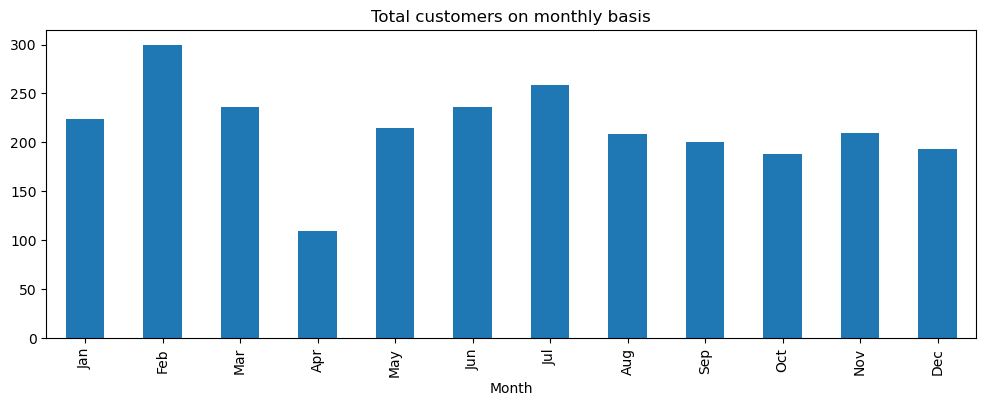

In [21]:
monthly_customer_count = df.groupby('Month')['CustomerID'].nunique()
monthly_customer_count.reset_index()

plt.figure(figsize=(12, 4))
monthly_customer_count.plot(kind='bar')
plt.xticks(ticks= range(0,12), labels=months)
plt.title('Total customers on monthly basis')
plt.show()



In [22]:
# month_dict = {}
# for i in months:
#    month_dict[i] = df[df['Month']==i]['CustomerID'].unique().tolist()

# months = ['Jan', 'Feb', 'Mar'plt.figure(figsize=(8, 3))
# , 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# retention = []
# for i in range(11):
#   set1 = set(month_dict[months[i]])
#   set2 = set(month_dict[months[i+1]])
#   common= len(set1.intersection(set2))
#   retention.append(common)


# plt.figure(figsize=(11,5))
# plt.bar(retention,months)  
# plt.title('Monthly Retention of Customers')
# plt.show()

#### How the discounts playing role in the revenues?

In [23]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Offline_Spend,Online_Spend,Weekday,Sales
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,0.1,0.10,4500,2424.5,Tue,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,0.1,0.10,4500,2424.5,Tue,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,M,Chicago,12,OFF10,0.1,0.10,4500,2424.5,Tue,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,M,Chicago,12,SALE10,0.1,0.18,4500,2424.5,Tue,99.5843
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,M,Chicago,12,AIO10,0.1,0.18,4500,2424.5,Tue,24.0230


Text(0.5, 1.0, 'Sales by Coupon Usage')

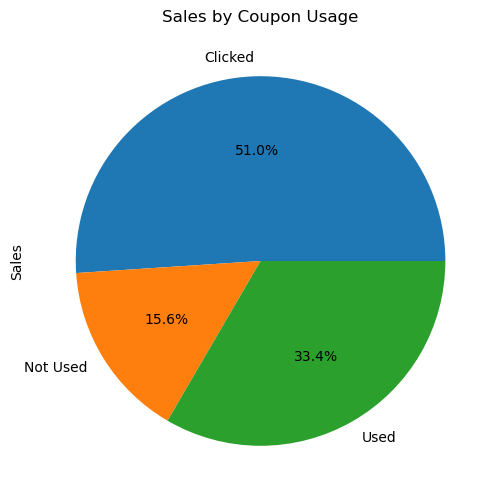

In [24]:
coupon_df=df.groupby('Coupon_Status')['Sales'].sum()
coupon_df

plt.figure(figsize=(11,6))
coupon_df.plot(kind='pie',autopct='%1.1f%%',labels=coupon_df.index)
plt.title('Sales by Coupon Usage')

#### Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [25]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Offline_Spend,Online_Spend,Weekday,Sales
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,0.1,0.10,4500,2424.5,Tue,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,0.1,0.10,4500,2424.5,Tue,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,M,Chicago,12,OFF10,0.1,0.10,4500,2424.5,Tue,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,M,Chicago,12,SALE10,0.1,0.18,4500,2424.5,Tue,99.5843
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,M,Chicago,12,AIO10,0.1,0.18,4500,2424.5,Tue,24.0230


* Total Sales by months

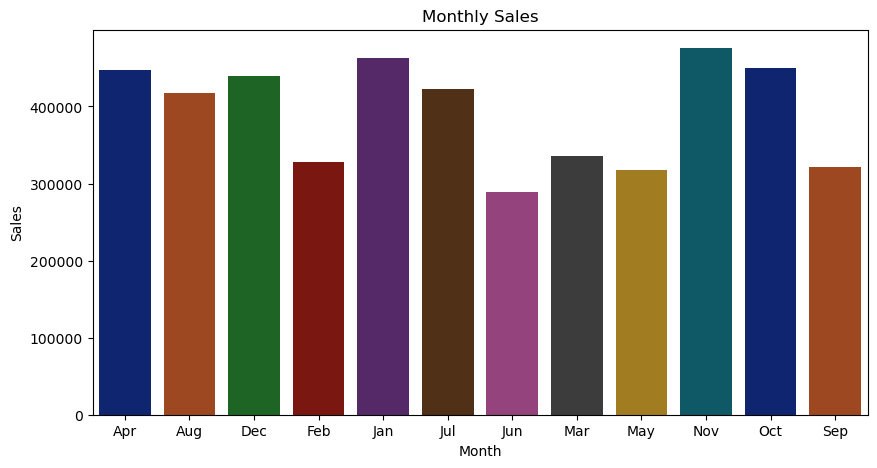

In [26]:
grouped_sales=df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
sns.barplot(grouped_sales,palette='dark')
plt.title('Monthly Sales')
plt.show()

* Total Sales per weekday basis

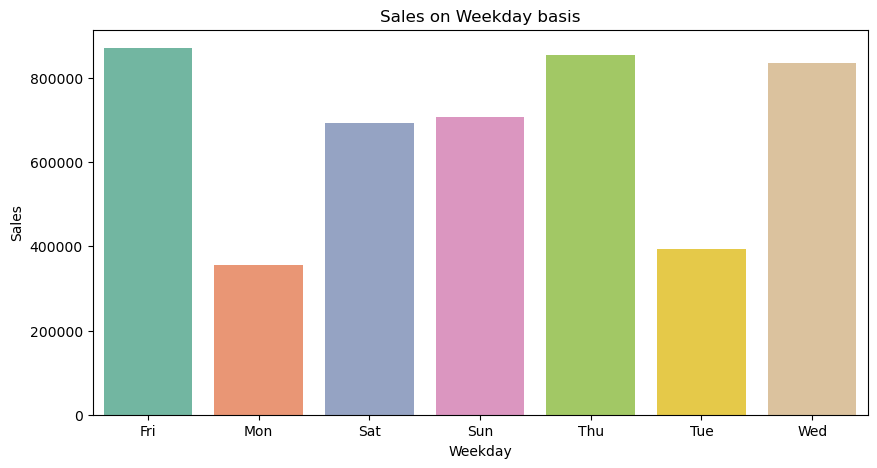

In [27]:
grouped_weekday=df.groupby('Weekday')['Sales'].sum()

plt.figure(figsize=(10,5))
sns.barplot(grouped_weekday,palette='Set2')
plt.title('Sales on Weekday basis')
plt.show()

* Total Sales by Category

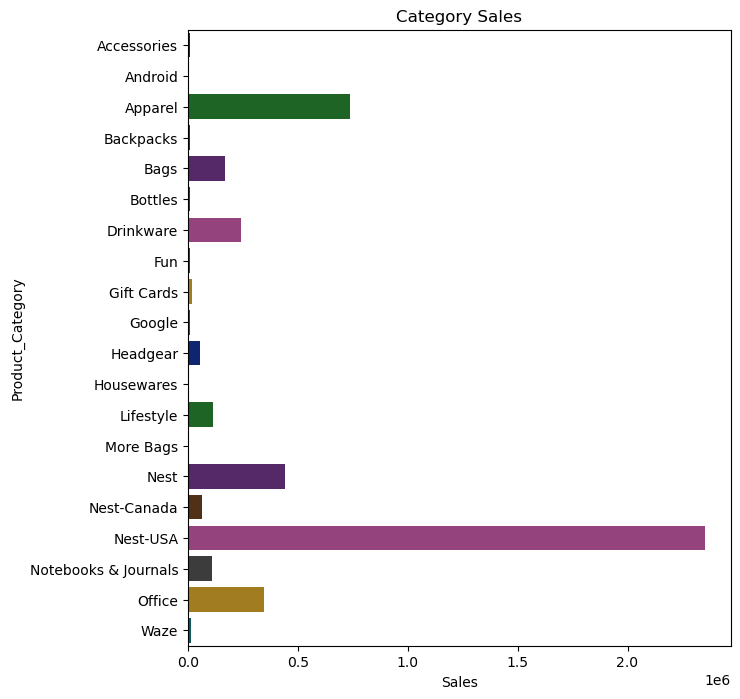

In [28]:
grouped_cat=df.groupby('Product_Category')['Sales'].sum()

plt.figure(figsize=(7,8))
sns.barplot(grouped_cat,palette='dark',orient='h')
plt.title('Category Sales')
plt.show()

* Total Sales by quantity

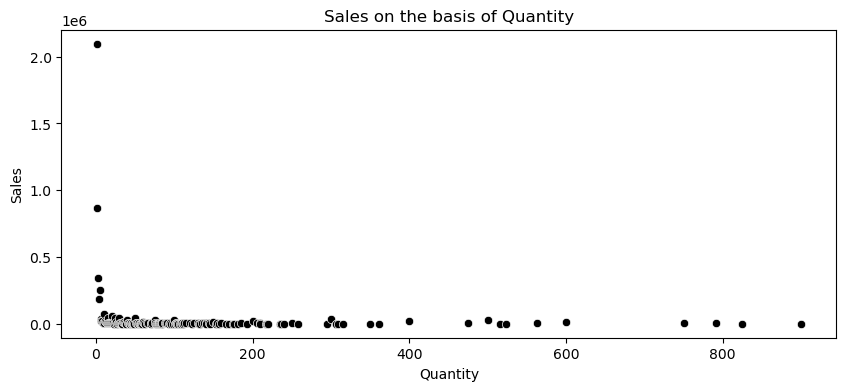

In [34]:
grouped_qty=df.groupby('Quantity')['Sales'].sum()

plt.figure(figsize=(10,4))
sns.scatterplot(grouped_qty,color='black')
plt.title('Sales on the basis of Quantity')
plt.show()

* No. of orders by months

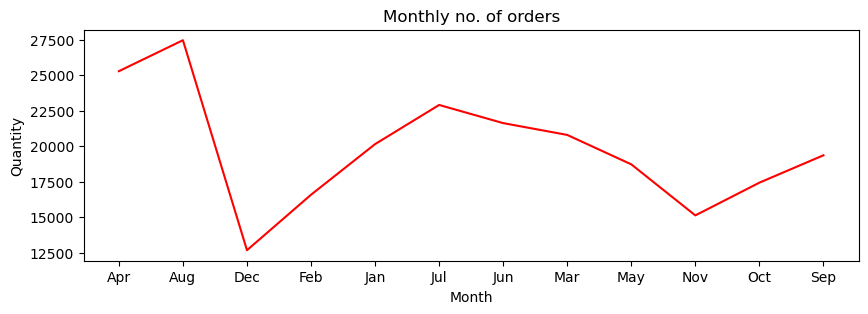

In [30]:
grouped_orders=df.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(10,3))
sns.lineplot(grouped_orders,color='red',markers='o')
plt.title('Monthly no. of orders')
plt.show()

* No. of orders weekday basis

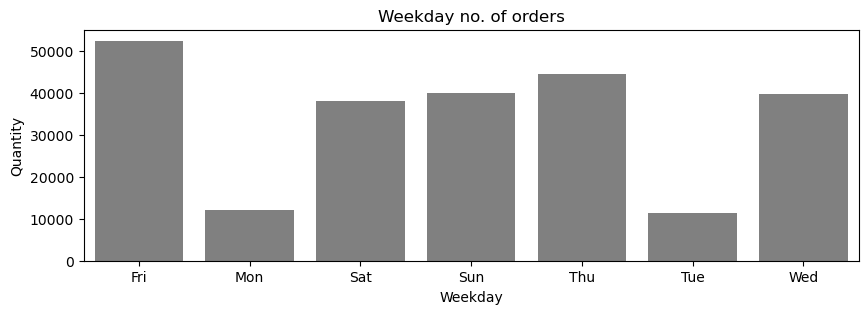

In [31]:
grouped_orders_weekday=df.groupby('Weekday')['Quantity'].sum()

plt.figure(figsize=(10,3))
sns.barplot(grouped_orders_weekday,color='grey')
plt.title('Weekday no. of orders')
plt.show()

* No. of orders by category

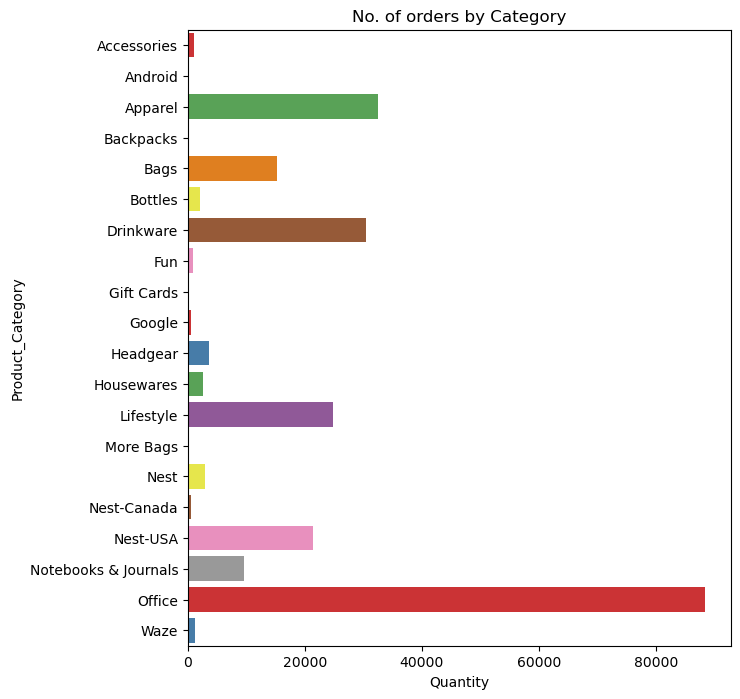

In [32]:
grouped_ord_qty=df.groupby('Product_Category')['Quantity'].sum()

plt.figure(figsize=(7,8))
sns.barplot(grouped_ord_qty,orient='h',palette='Set1')
plt.title('No. of orders by Category')
plt.show()

* Average order value by category

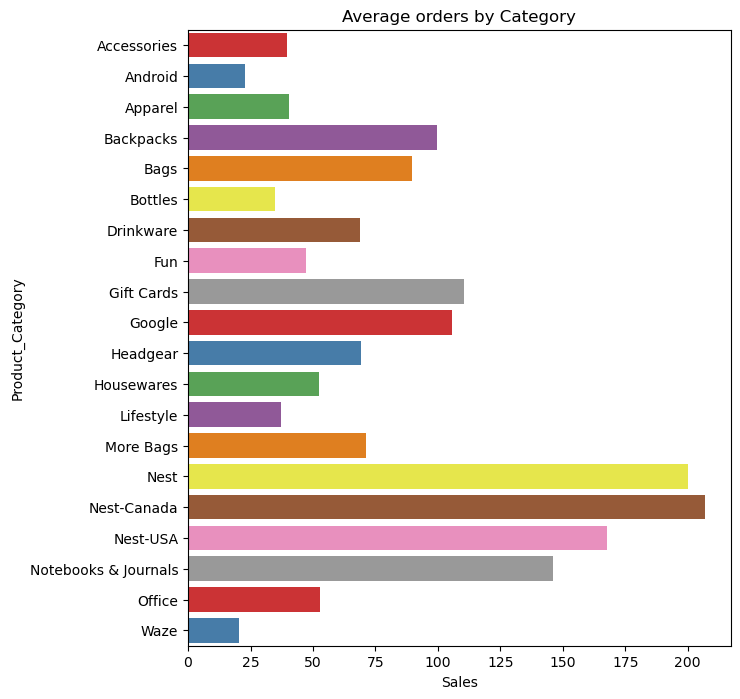

In [33]:
avg_value_category=df.groupby('Product_Category')['Sales'].mean()

plt.figure(figsize=(7,8))
sns.barplot(avg_value_category,orient='h',palette='Set1')
plt.title('Average orders by Category')
plt.show()

* Monthly average order value

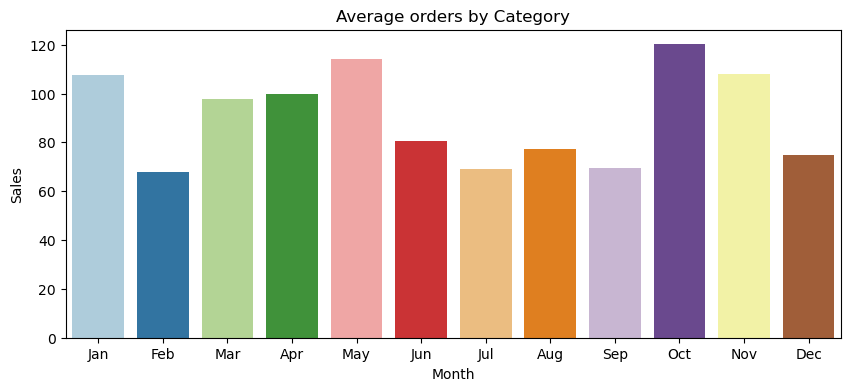

In [34]:
monthly_avg_value=df.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10,4))
sns.barplot(monthly_avg_value,palette='Paired')
plt.title('Average orders by Category')
plt.xticks(ticks= range(0,12),labels=months)
plt.show()

#### Understanding the trends/seasonality of sales by category, location, month 

In [35]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Offline_Spend',
       'Online_Spend', 'Weekday', 'Sales'],
      dtype='object')

In [36]:
trends_df=pd.pivot_table(data=df, index='Month',columns='Location',values='Sales', aggfunc='sum')

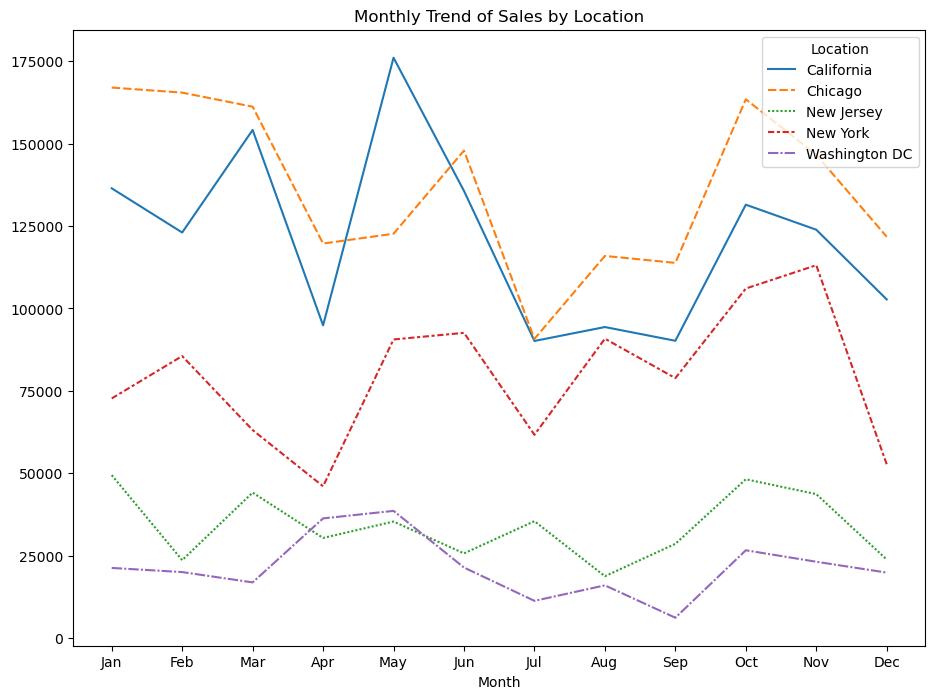

In [37]:
plt.figure(figsize=(11,8))
sns.lineplot(trends_df)
plt.xticks(ticks= range(0,12),labels=months)
plt.title('Monthly Trend of Sales by Location')
plt.show()

#### Calculating the Revenue, Marketing spend, delivery charges by month.


In [38]:
df['Total_spend']=df['Online_Spend']+df['Offline_Spend']

In [39]:
summary_=df.groupby('Month').agg({'Sales':'sum','Total_spend':'sum','GST':'sum','Delivery_Charges':'sum'})
summary_

,Sales,Total_spend,GST,Delivery_Charges
Month,,,,
Apr,446904.62519,21655922.13,591.56,41481.74
Aug,417769.20200,28385733.77,913.41,61099.57
Dec,439530.03015,28964402.01,548.88,37881.99
Feb,327335.84560,15841536.05,447.00,49216.60
Jan,463291.96613,20052775.17,535.06,59242.32
Jul,423282.67641,20618934.41,760.71,48723.93
Jun,289380.86159,18625403.73,600.45,37513.58
Mar,335924.08735,17453780.31,616.01,60799.94
May,317702.67032,17525521.02,662.23,41396.17


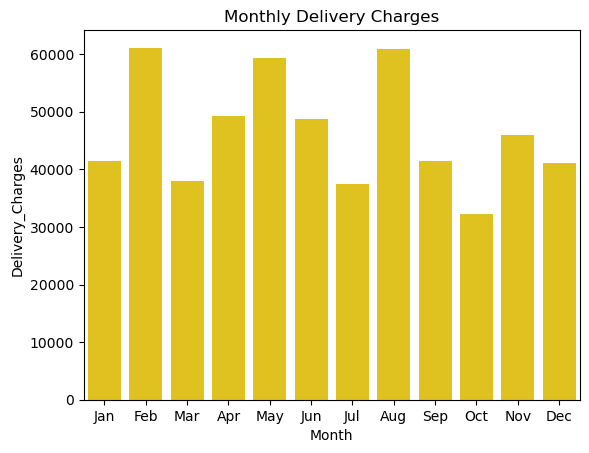

In [40]:
## Monthly delivery charges:

grouped_del_charge=df.groupby('Month')['Delivery_Charges'].sum()

sns.barplot(grouped_del_charge,color='gold')
plt.xticks(ticks= range(0,12),labels=months)
plt.title('Monthly Delivery Charges')
plt.show()

#### Impact of marketing spend on revenue

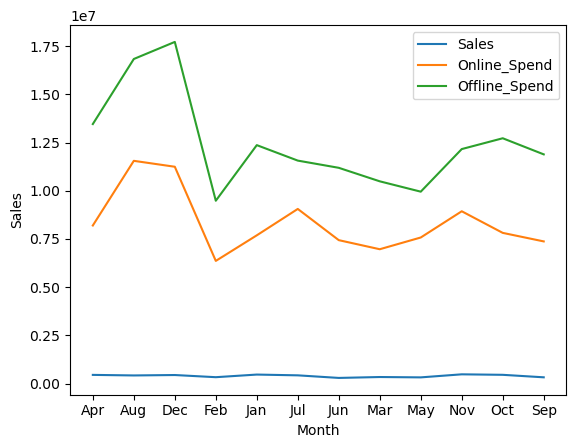

In [41]:
grouped_rev_spend=df.groupby('Month').agg({'Sales':'sum','Online_Spend':'sum','Offline_Spend':'sum'})

sns.lineplot(data=grouped_rev_spend,x='Month', y= 'Sales',label='Sales')
sns.lineplot( data=grouped_rev_spend ,x='Month',y= 'Online_Spend',label='Online_Spend')
sns.lineplot(data=grouped_rev_spend,x= 'Month',y='Offline_Spend',label='Offline_Spend')
plt.legend()
plt.show()

#### Mostly bought product based on the quantity

In [42]:
df_qty=df.groupby('Product_Category')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False,ignore_index=True).head(1)
df_qty

,Product_Category,Quantity
0,Office,88383


Office supplies is the mostly bought product with the quantity of 88383

-------------
---------

#### Performing Customer Segmentation
* Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,
Standard customers and define strategy on the same.
* Scientific (Using K-Means) & Understand the profiles. Define strategy for each
segment.

In [43]:
df.drop(columns=['Online_Spend','Offline_Spend','Product_SKU','Product_Description'],inplace=True)

In [44]:
df_copy=df.copy()
df_copy

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Weekday,Sales,Total_spend
0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,0.1,0.10,Tue,158.67290,6924.50
1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,0.1,0.10,Tue,158.67290,6924.50
2,17850,16681,2019-01-01,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,OFF10,0.1,0.10,Tue,8.52950,6924.50
3,17850,16682,2019-01-01,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,SALE10,0.1,0.18,Tue,99.58430,6924.50
4,17850,16682,2019-01-01,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,AIO10,0.1,0.18,Tue,24.02300,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,Nest-USA,1,121.30,6.50,Clicked,Dec,F,New York,45,ELEC30,0.3,0.10,Tue,99.90100,6058.75
52920,14410,48494,2019-12-31,Apparel,1,48.92,6.50,Used,Dec,F,New York,45,SALE30,0.3,0.18,Tue,46.90792,6058.75
52921,14410,48495,2019-12-31,Nest-USA,1,151.88,6.50,Used,Dec,F,New York,45,ELEC30,0.3,0.10,Tue,123.44760,6058.75
52922,14600,48496,2019-12-31,Nest-USA,5,80.52,6.50,Clicked,Dec,F,California,7,ELEC30,0.3,0.10,Tue,316.50200,6058.75


In [45]:
df.drop(columns=['CustomerID', 'Transaction_ID'],inplace=True)

In [46]:
df.drop(columns=['Coupon_Code'],inplace=True)

In [47]:
df.head(2)

,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Discount_pct,GST,Weekday,Sales,Total_spend
0,2019-01-01,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,0.1,0.1,Tue,158.6729,6924.5
1,2019-01-01,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,0.1,0.1,Tue,158.6729,6924.5


#### Correlation check

<Axes: >

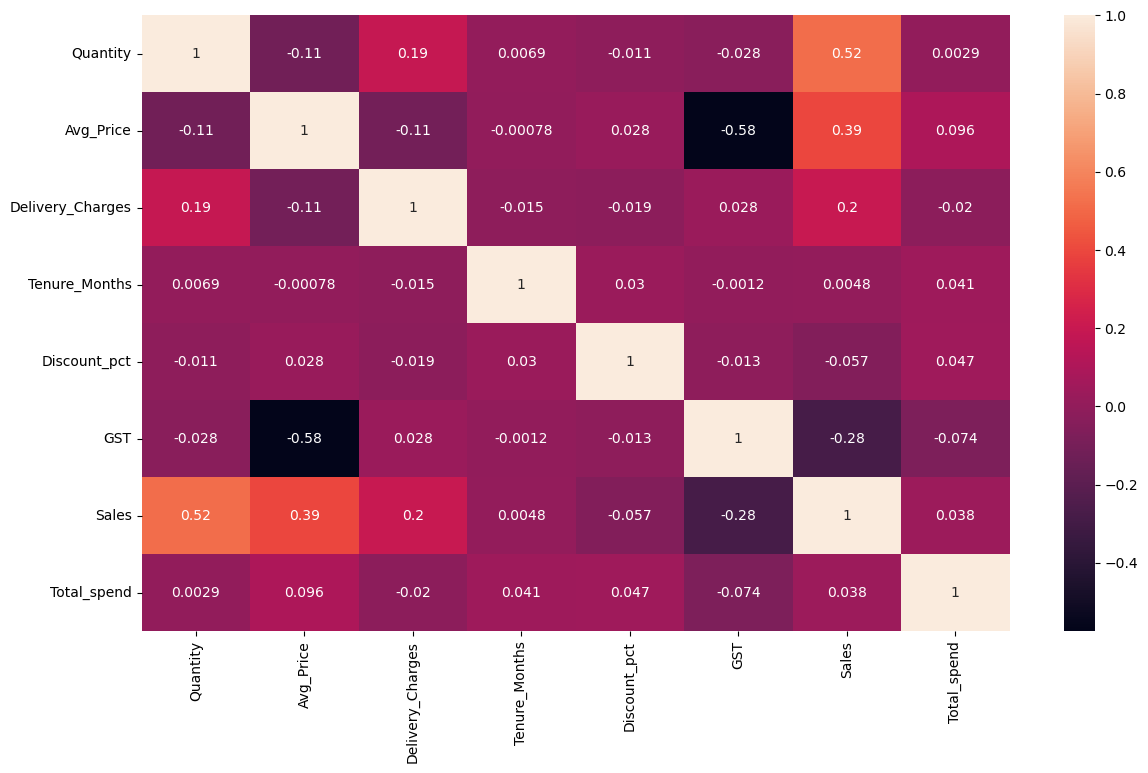

In [48]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#### Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df.dtypes

Transaction_Date    datetime64[ns]
Product_Category            object
Quantity                     int64
Avg_Price                  float64
Delivery_Charges           float64
Coupon_Status               object
Month                       object
Gender                      object
Location                    object
Tenure_Months                int64
Discount_pct               float64
GST                        float64
Weekday                     object
Sales                      float64
Total_spend                float64
dtype: object

In [51]:
df.columns

Index(['Transaction_Date', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'GST', 'Weekday', 'Sales',
       'Total_spend'],
      dtype='object')

In [52]:
cat_col=['Product_Category','Coupon_Status', 'Month', 'Gender', 'Location','Weekday']

In [53]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])
    

In [54]:
df.head()

,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Discount_pct,GST,Weekday,Sales,Total_spend
0,2019-01-01,16,1,153.71,6.5,2,4,1,1,12,0.1,0.10,5,158.6729,6924.5
1,2019-01-01,16,1,153.71,6.5,2,4,1,1,12,0.1,0.10,5,158.6729,6924.5
2,2019-01-01,18,1,2.05,6.5,2,4,1,1,12,0.1,0.10,5,8.5295,6924.5
3,2019-01-01,2,5,17.53,6.5,1,4,1,1,12,0.1,0.18,5,99.5843,6924.5
4,2019-01-01,4,1,16.50,6.5,2,4,1,1,12,0.1,0.18,5,24.0230,6924.5


In [55]:
df1=df.copy()

In [56]:
df.drop(columns=['Transaction_Date'],inplace=True)

#### Handling Outliers

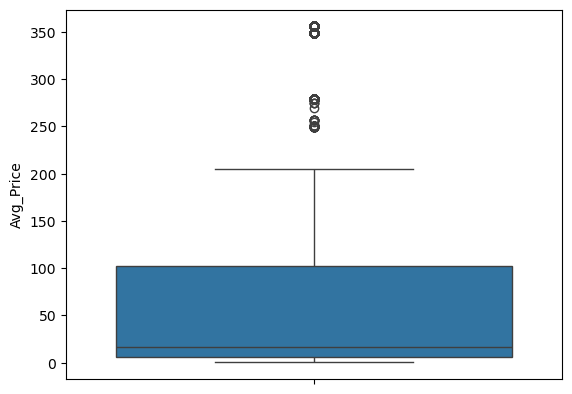

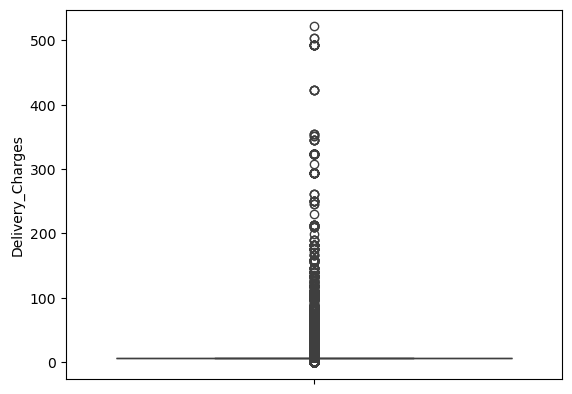

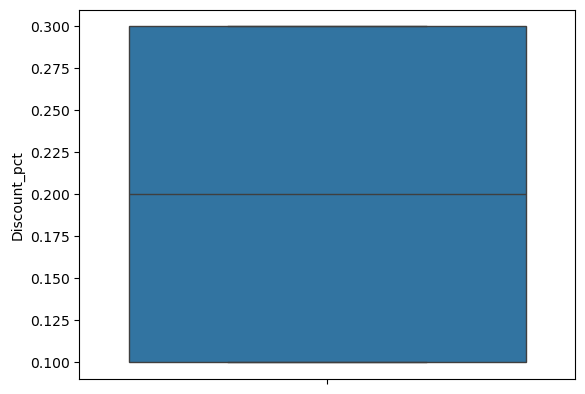

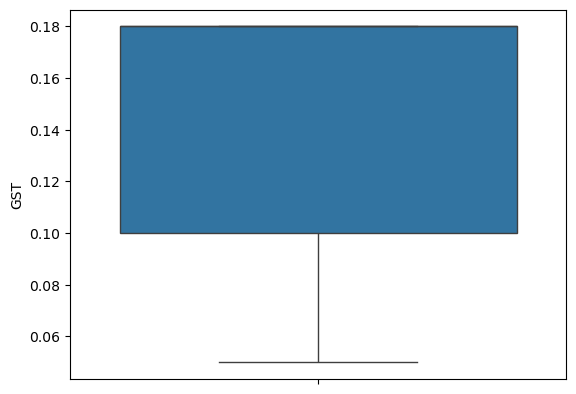

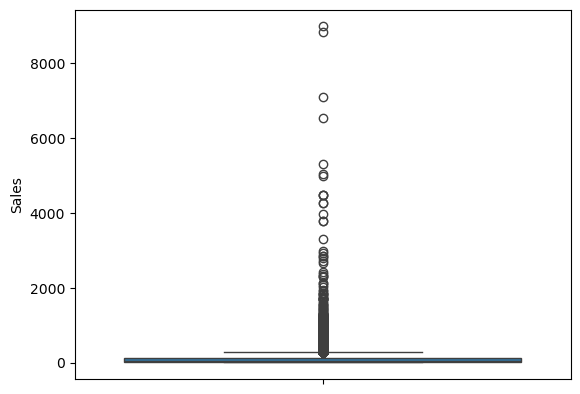

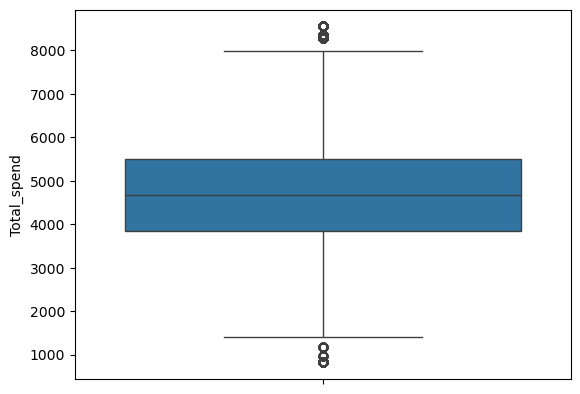

In [57]:
for i in df.select_dtypes('float'):
    sns.boxplot(df[i])
    plt.show()
    

In [58]:
### IQR:

q1=df['Sales'].quantile(0.25)
q3= df['Sales'].quantile(0.75)

IQR= q3-q1

ll= q1 -1.5*IQR
ul= q3 + 1.5*IQR

print(ll,ul)


-138.807 280.80035999999996


In [59]:
df_new=df[(df['Sales']>=ll) & (df['Sales']<=ul)]

#### Standardisation of data

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [61]:
final_df=pd.DataFrame(ss.fit_transform(df_new))

#### Model Selection

In [62]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(final_df)

KMeans(n_clusters=4)

In [63]:
km_predict=km.predict(final_df)

In [64]:
km_df=pd.DataFrame(km_predict,columns=['Label'])

In [65]:
km_df.Label.unique()

array([0, 1, 3, 2])

In [66]:
km_df.Label.value_counts()

Label
0    14568
2    14212
3    12262
1     9002
Name: count, dtype: int64

In [67]:
{'Premium', 'Gold', 'Silver', 'Standard'} 

{'Gold', 'Premium', 'Silver', 'Standard'}

In [68]:
df_copy

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Weekday,Sales,Total_spend
0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,0.1,0.10,Tue,158.67290,6924.50
1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,0.1,0.10,Tue,158.67290,6924.50
2,17850,16681,2019-01-01,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,OFF10,0.1,0.10,Tue,8.52950,6924.50
3,17850,16682,2019-01-01,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,SALE10,0.1,0.18,Tue,99.58430,6924.50
4,17850,16682,2019-01-01,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,AIO10,0.1,0.18,Tue,24.02300,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,Nest-USA,1,121.30,6.50,Clicked,Dec,F,New York,45,ELEC30,0.3,0.10,Tue,99.90100,6058.75
52920,14410,48494,2019-12-31,Apparel,1,48.92,6.50,Used,Dec,F,New York,45,SALE30,0.3,0.18,Tue,46.90792,6058.75
52921,14410,48495,2019-12-31,Nest-USA,1,151.88,6.50,Used,Dec,F,New York,45,ELEC30,0.3,0.10,Tue,123.44760,6058.75
52922,14600,48496,2019-12-31,Nest-USA,5,80.52,6.50,Clicked,Dec,F,California,7,ELEC30,0.3,0.10,Tue,316.50200,6058.75


In [36]:
##Calculate Recency, Frequency, and Monetary values:

current_date = max(df_copy['Transaction_Date'])  # Replace with current date

rfm =df_copy.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,  # Recency
    'CustomerID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
})
rfm
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [70]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,107,2,174.98174
12347,59,60,12085.37220
12348,73,23,1501.92620
12350,17,17,1183.71394
12356,107,36,1753.45086
...,...,...,...
18259,270,7,812.25856
18260,87,40,2636.19553
18269,194,8,155.66092


In [71]:
# RFM scoring
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])

def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.50]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

rfm['R'] = rfm['Recency'].apply(r_score)
rfm['F'] = rfm['Frequency'].apply(fm_score, args=('Frequency',))
rfm['M'] = rfm['Monetary'].apply(fm_score, args=('Monetary',))

# Combine the R, F, and M scores into a single RFM segment
rfm['RFM_Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

# Define your RFM segments and strategies
segment_mapping = {
    '444': 'Premium',
    '311': 'Gold',
    '144': 'Silver',
    '111': 'Standard'
}

rfm['Segment'] = rfm['RFM_Segment'].map(segment_mapping)

# Display the resulting DataFrame
print(rfm.head())

            Recency  Frequency     Monetary  R  F  M RFM_Segment Segment
CustomerID                                                              
12346           107          2    174.98174  3  1  1         311    Gold
12347            59         60  12085.37220  3  4  4         344     NaN
12348            73         23   1501.92620  3  3  2         332     NaN
12350            17         17   1183.71394  4  2  2         422     NaN
12356           107         36   1753.45086  3  3  2         332     NaN


In [83]:
# Select relevant features
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Determine the optimal number of clusters (K) using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i)
print(wcss)

1
2
3
4
5
6
7
8
9
10
[38797329514.07389, 20114422914.66409, 8320483360.707308, 4673477648.275442, 3056096341.1861916, 2175201088.794125, 1485857293.3279986, 1086134239.7431273, 804280614.4431747, 655801032.1145399]


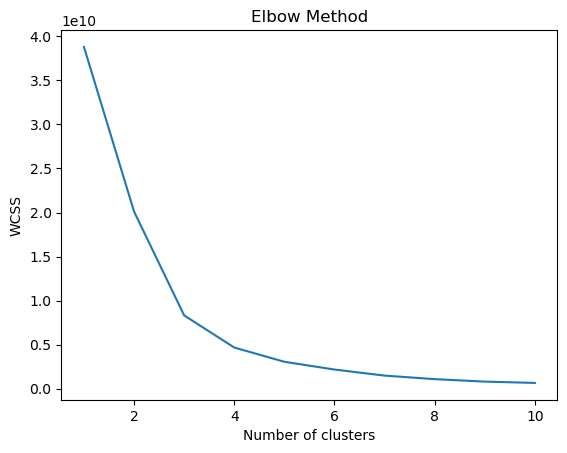

In [73]:
# Plot the Elbow method to find the optimal K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()